**1. Importar la base de datos Walmart**



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [ ]:
import statsmodels.stats.api as sms
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.compat import lzip

In [ ]:
df = pd.read_csv("/content/Walmart(1).csv")
df.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,12-03-2010,1439541.59,0,57.79,2.667,211.380643,8.106
6,1,19-03-2010,1472515.79,0,54.58,2.720,211.215635,8.106
7,1,26-03-2010,1404429.92,0,51.45,2.732,211.018042,8.106
8,1,02-04-2010,1594968.28,0,62.27,2.719,210.820450,7.808
9,1,09-04-2010,1545418.53,0,65.86,2.770,210.622857,7.808


In [ ]:
df.rename({'Store':'Tienda', 'Date':'Fecha', 'Weekly_Sales':'Ventas', 'Holiday_Flag': 'Festivo',
           'Temperature': 'Temperatura', 'Fuel_Price': 'Combustible',
           'Unemployment':'Desempleo', }, axis=1, inplace=True)
df.head(10)

,Tienda,Fecha,Ventas,Festivo,Temperatura,Combustible,CPI,Desempleo
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,12-03-2010,1439541.59,0,57.79,2.667,211.380643,8.106
6,1,19-03-2010,1472515.79,0,54.58,2.720,211.215635,8.106
7,1,26-03-2010,1404429.92,0,51.45,2.732,211.018042,8.106
8,1,02-04-2010,1594968.28,0,62.27,2.719,210.820450,7.808
9,1,09-04-2010,1545418.53,0,65.86,2.770,210.622857,7.808


In [ ]:
df['Fecha'] = pd.to_datetime(df['Fecha'], format='%d-%m-%Y') # Specify the correct date format


In [ ]:
df['Dia'] = df['Fecha'].dt.day
df['Mes'] = df['Fecha'].dt.month
df['Año'] = df['Fecha'].dt.year

df

,Tienda,Fecha,Ventas,Festivo,Temperatura,Combustible,CPI,Desempleo,Dia,Mes,Año
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,5,2,2010
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,12,2,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,5,3,2010
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,28,9,2012
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,5,10,2012
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,12,10,2012
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,19,10,2012


**2. Descriptivos de las variables**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Tienda       6435 non-null   int64         
 1   Fecha        6435 non-null   datetime64[ns]
 2   Ventas       6435 non-null   float64       
 3   Festivo      6435 non-null   int64         
 4   Temperatura  6435 non-null   float64       
 5   Combustible  6435 non-null   float64       
 6   CPI          6435 non-null   float64       
 7   Desempleo    6435 non-null   float64       
 8   Dia          6435 non-null   int32         
 9   Mes          6435 non-null   int32         
 10  Año          6435 non-null   int32         
dtypes: datetime64[ns](1), float64(5), int32(3), int64(2)
memory usage: 477.7 KB


Numéricas

In [ ]:
df.describe()

,Tienda,Fecha,Ventas,Festivo,Temperatura,Combustible,CPI,Desempleo,Dia,Mes,Año
count,6435.000000,6435,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,2011-06-17 00:00:00,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151,15.678322,6.447552,2010.965035
min,1.000000,2010-02-05 00:00:00,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000,1.000000,1.000000,2010.000000
25%,12.000000,2010-10-08 00:00:00,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000,8.000000,4.000000,2010.000000
50%,23.000000,2011-06-17 00:00:00,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000,16.000000,6.000000,2011.000000
75%,34.000000,2012-02-24 00:00:00,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000,23.000000,9.000000,2012.000000
max,45.000000,2012-10-26 00:00:00,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000,31.000000,12.000000,2012.000000
std,12.988182,NaN,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885,8.755780,3.238308,0.797019


Categóricas

In [ ]:
df.describe(include='object')

ValueError: No objects to concatenate

No tenemos variables categóricas

**3**. **Evaluación de los datos perdidos**

In [ ]:
df.isnull().sum()

Tienda         0
Fecha          0
Ventas         0
Festivo        0
Temperatura    0
Combustible    0
CPI            0
Desempleo      0
Dia            0
Mes            0
Año            0
dtype: int64

No existen valores nulos por lo cual no se debe generar ningun tratamiento a los datos en cuanto a esta consideracion

In [ ]:
print(df)

      Tienda      Fecha      Ventas  Festivo  Temperatura  Combustible  \
0          1 2010-02-05  1643690.90        0        42.31        2.572   
1          1 2010-02-12  1641957.44        1        38.51        2.548   
2          1 2010-02-19  1611968.17        0        39.93        2.514   
3          1 2010-02-26  1409727.59        0        46.63        2.561   
4          1 2010-03-05  1554806.68        0        46.50        2.625   
...      ...        ...         ...      ...          ...          ...   
6430      45 2012-09-28   713173.95        0        64.88        3.997   
6431      45 2012-10-05   733455.07        0        64.89        3.985   
6432      45 2012-10-12   734464.36        0        54.47        4.000   
6433      45 2012-10-19   718125.53        0        56.47        3.969   
6434      45 2012-10-26   760281.43        0        58.85        3.882   

             CPI  Desempleo  Dia  Mes   Año  
0     211.096358      8.106    5    2  2010  
1     211.242170   

**4. Evaluación de datos atípicos (outliners)**

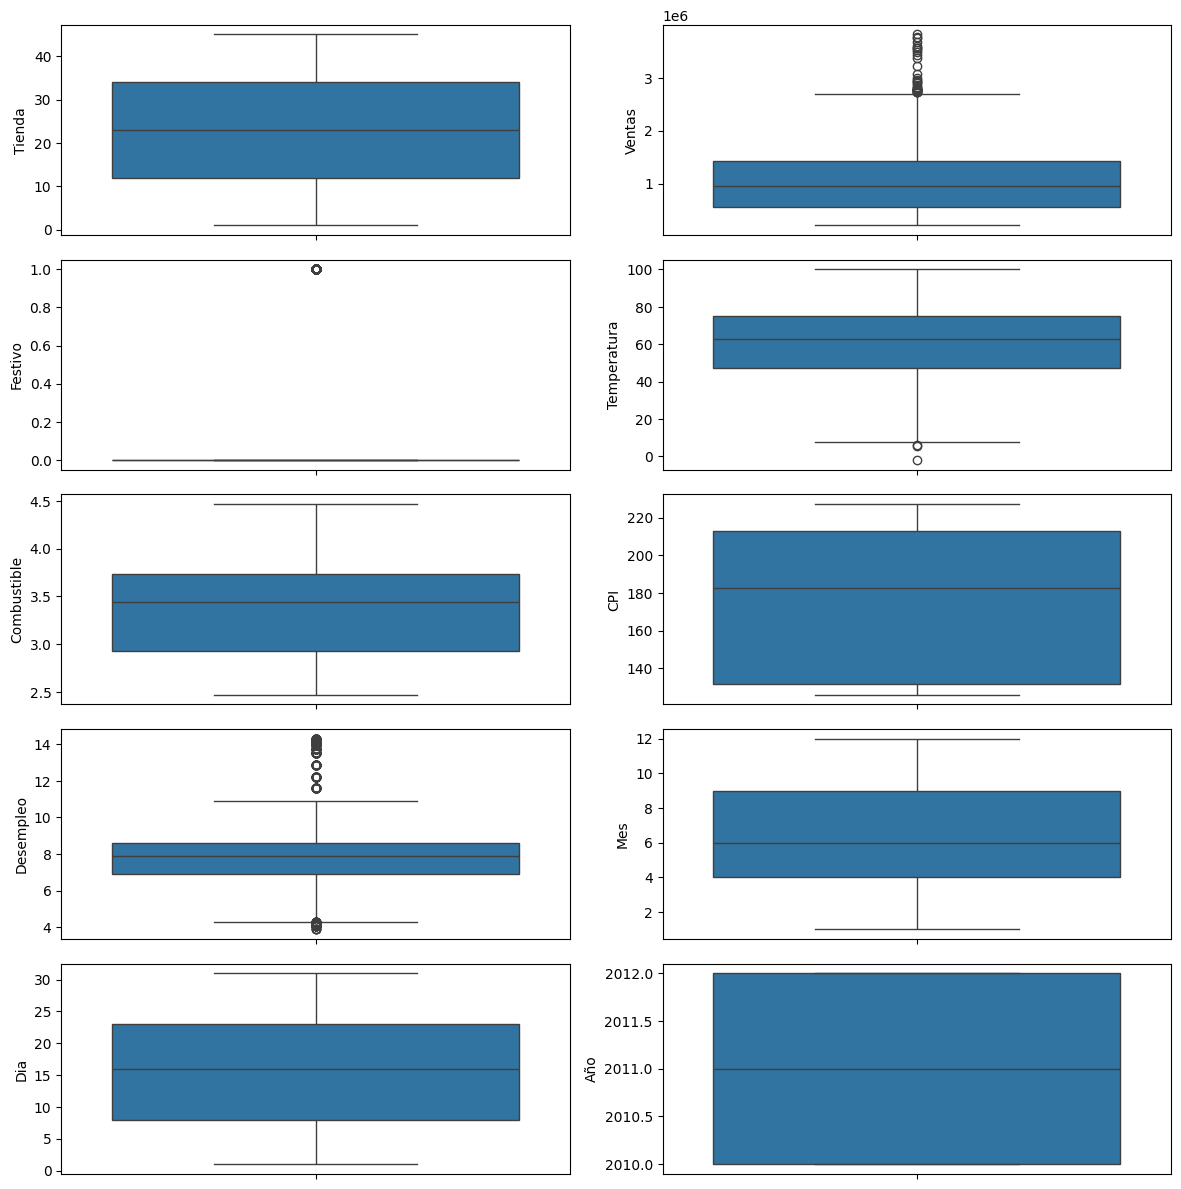

In [ ]:
fig, axs = plt.subplots(5,2, figsize = (12,12))
plt1 = sns.boxplot(df['Tienda'], ax = axs[0,0])
plt2 = sns.boxplot(df['Ventas'], ax = axs[0,1])
plt1 = sns.boxplot(df['Festivo'], ax = axs[1,0])
plt2 = sns.boxplot(df['Temperatura'], ax = axs[1,1])
plt1 = sns.boxplot(df['Combustible'], ax = axs[2,0])
plt2 = sns.boxplot(df['CPI'], ax = axs[2,1])
plt1 = sns.boxplot(df['Desempleo'], ax = axs[3,0])
plt2 = sns.boxplot(df['Mes'], ax = axs[3,1])
plt1 = sns.boxplot(df['Dia'], ax = axs[4,0])
plt2 = sns.boxplot(df['Año'], ax = axs[4,1])
plt.tight_layout()

In [ ]:
cuartiles = df.select_dtypes(include=['number']).quantile([0.25, 0.5, 0.75])
print(cuartiles)

      Tienda       Ventas  Festivo  Temperatura  Combustible         CPI  \
0.25    12.0   553350.105      0.0        47.46        2.933  131.735000   
0.50    23.0   960746.040      0.0        62.67        3.445  182.616521   
0.75    34.0  1420158.660      0.0        74.94        3.735  212.743293   

      Desempleo   Dia  Mes     Año  
0.25      6.891   8.0  4.0  2010.0  
0.50      7.874  16.0  6.0  2011.0  
0.75      8.622  23.0  9.0  2012.0  


In [ ]:
# Identificar outliers
def identify_outliers(df):
    outliers = {}
    for column in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    return outliers

# Eliminar outliers
def remove_outliers(df):
    for column in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

df_cleaned = df.copy()

# Eliminar outliers iterativamente hasta que no queden más
max_iterations = 10
iteration = 0

while iteration < max_iterations:
    iteration += 1
    df_cleaned = remove_outliers(df_cleaned)
    outliers_after_cleaning = identify_outliers(df_cleaned)

    # Verificar si quedan outliers
    if all(len(values) == 0 for values in outliers_after_cleaning.values()):
        break

for column, values in outliers_after_cleaning.items():
    print(f'Outliers for {column}: {len(values)}')

Outliers for Tienda: 0
Outliers for Ventas: 0
Outliers for Festivo: 0
Outliers for Temperatura: 0
Outliers for Combustible: 0
Outliers for CPI: 0
Outliers for Desempleo: 0
Outliers for Dia: 0
Outliers for Mes: 0
Outliers for Año: 0


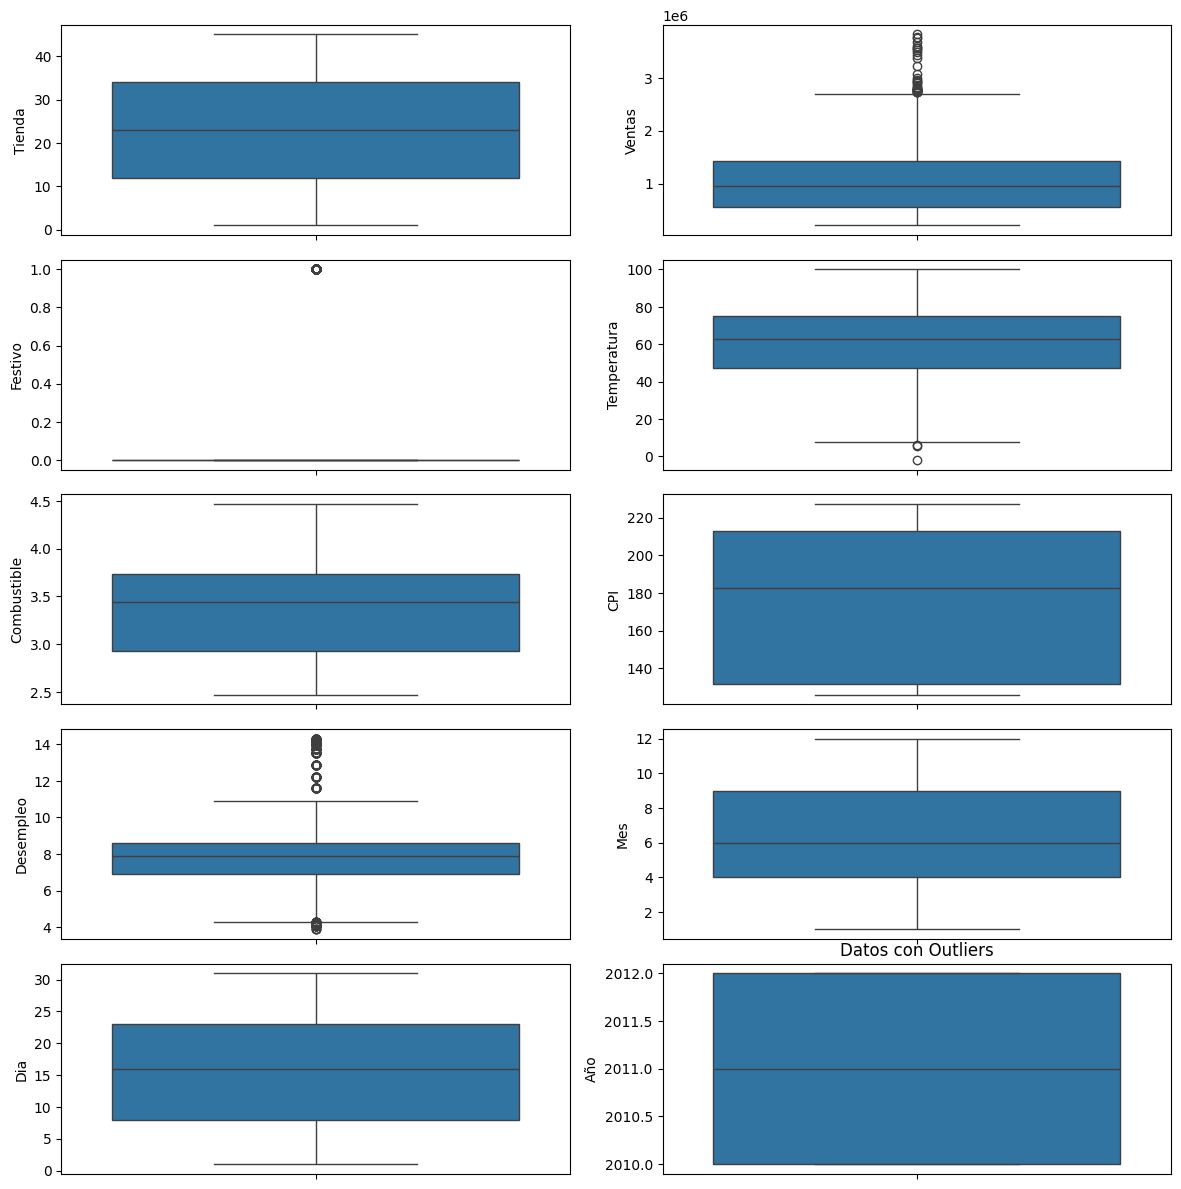

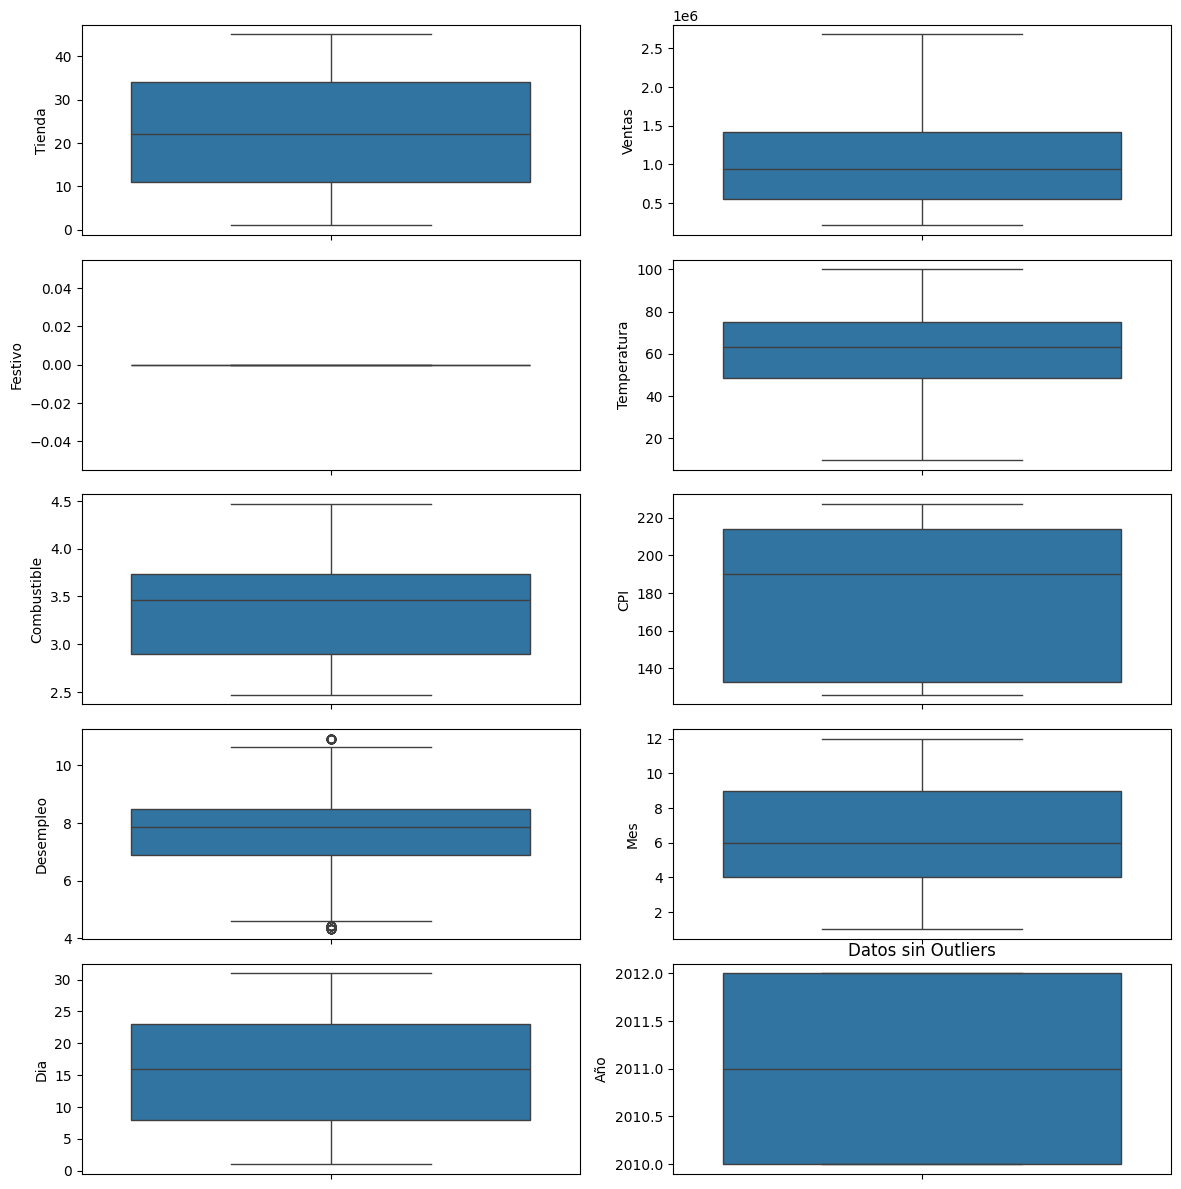

In [ ]:
# prompt: gráfica de los datos outliners

# Crear un nuevo DataFrame sin outliers
df_sin_outliers = remove_outliers(df.copy())

# Crear la gráfica de los datos con outliers
fig, axs = plt.subplots(5,2, figsize = (12,12))
plt1 = sns.boxplot(df['Tienda'], ax = axs[0,0])
plt2 = sns.boxplot(df['Ventas'], ax = axs[0,1])
plt1 = sns.boxplot(df['Festivo'], ax = axs[1,0])
plt2 = sns.boxplot(df['Temperatura'], ax = axs[1,1])
plt1 = sns.boxplot(df['Combustible'], ax = axs[2,0])
plt2 = sns.boxplot(df['CPI'], ax = axs[2,1])
plt1 = sns.boxplot(df['Desempleo'], ax = axs[3,0])
plt2 = sns.boxplot(df['Mes'], ax = axs[3,1])
plt1 = sns.boxplot(df['Dia'], ax = axs[4,0])
plt2 = sns.boxplot(df['Año'], ax = axs[4,1])
plt.tight_layout()
plt.title('Datos con Outliers')
plt.show()

# Crear la gráfica de los datos sin outliers
fig, axs = plt.subplots(5,2, figsize = (12,12))
plt1 = sns.boxplot(df_sin_outliers['Tienda'], ax = axs[0,0])
plt2 = sns.boxplot(df_sin_outliers['Ventas'], ax = axs[0,1])
plt1 = sns.boxplot(df_sin_outliers['Festivo'], ax = axs[1,0])
plt2 = sns.boxplot(df_sin_outliers['Temperatura'], ax = axs[1,1])
plt1 = sns.boxplot(df_sin_outliers['Combustible'], ax = axs[2,0])
plt2 = sns.boxplot(df_sin_outliers['CPI'], ax = axs[2,1])
plt1 = sns.boxplot(df_sin_outliers['Desempleo'], ax = axs[3,0])
plt2 = sns.boxplot(df_sin_outliers['Mes'], ax = axs[3,1])
plt1 = sns.boxplot(df_sin_outliers['Dia'], ax = axs[4,0])
plt2 = sns.boxplot(df_sin_outliers['Año'], ax = axs[4,1])
plt.tight_layout()
plt.title('Datos sin Outliers')
plt.show()


**5. Distribuciones de las variables**

Variables Numéricas

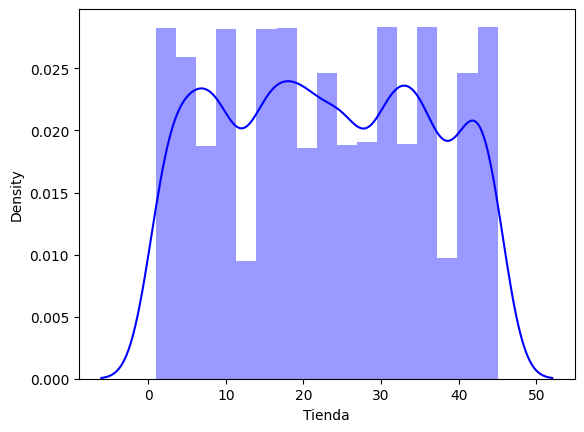

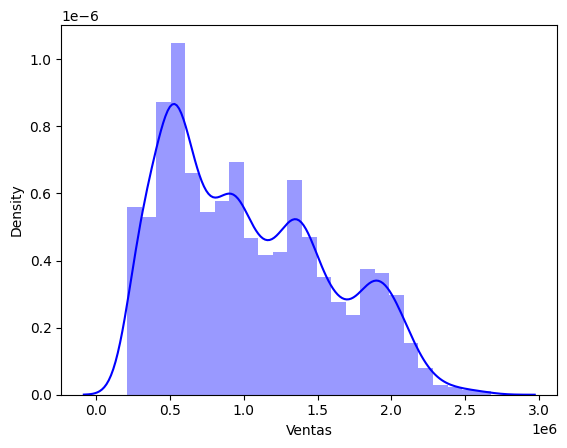

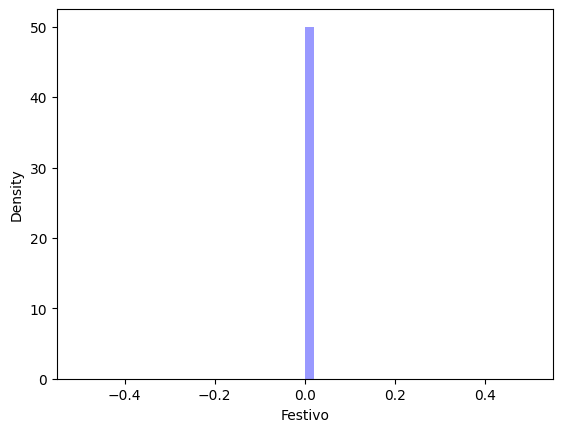

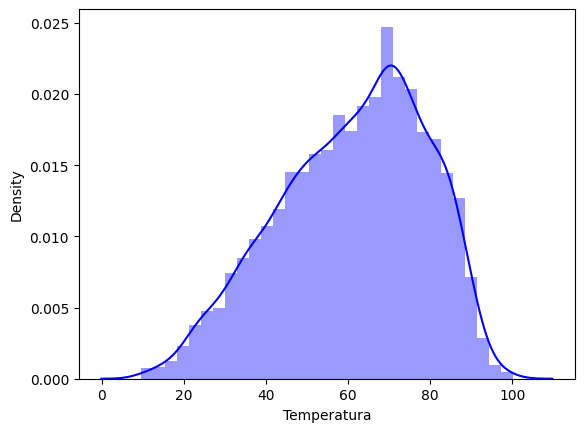

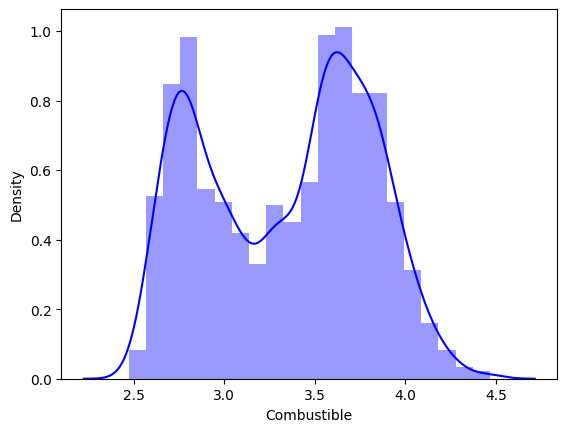

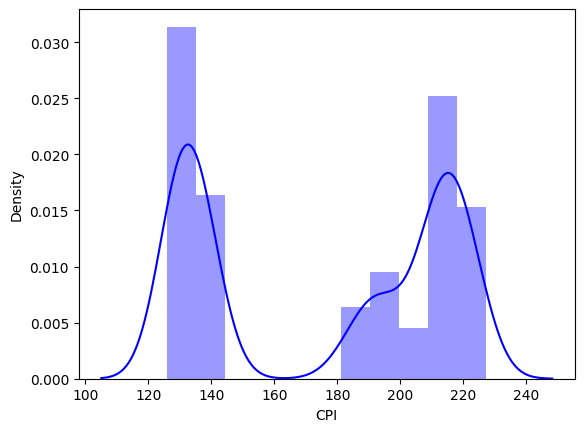

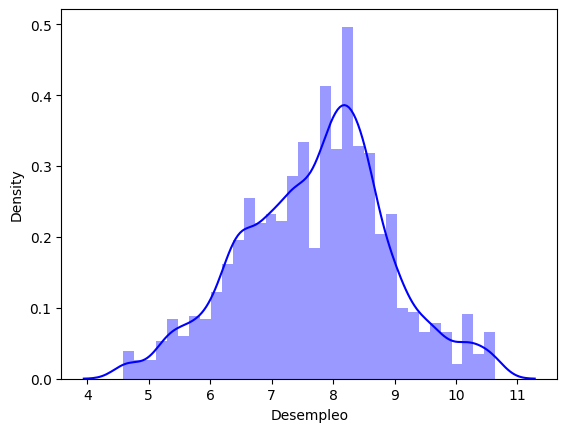

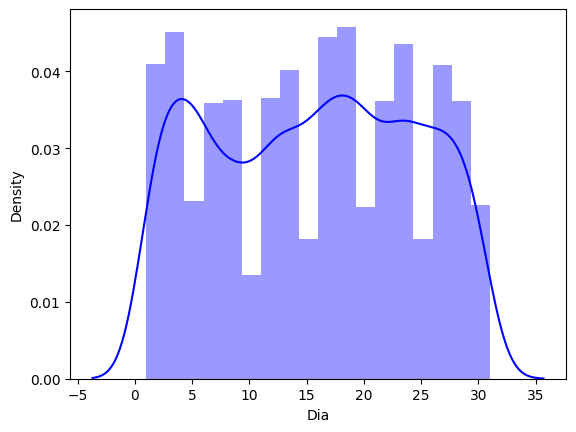

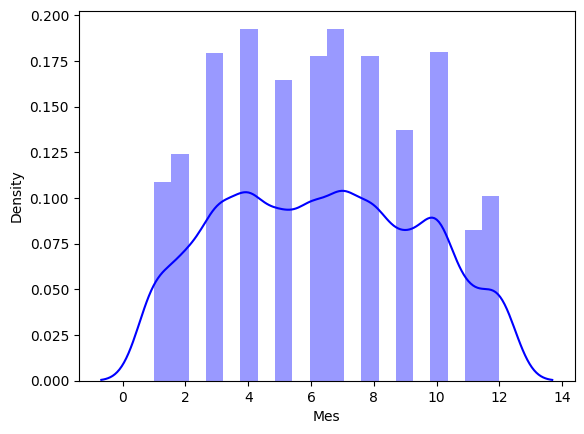

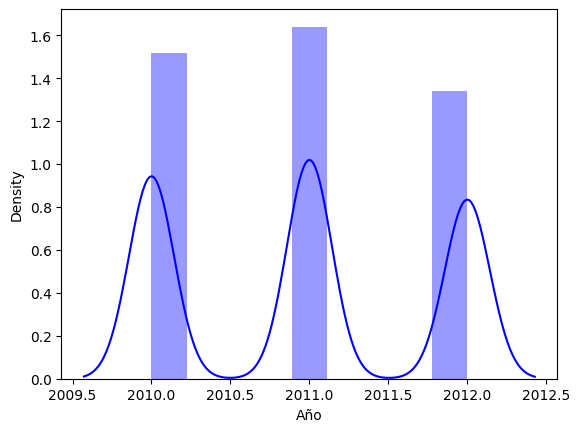

In [ ]:
numeric_cols = df_cleaned.select_dtypes(include=['number']).columns
for col in numeric_cols:
    plt.figure()
    sns.distplot(df_cleaned[col], kde=True, color="blue")
    plt.show()

Frecuencia de variables categóricas

In [ ]:
categorical_cols = df_cleaned.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure()
    df_cleaned[col].value_counts().plot(kind='bar')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

**6. Correlaciones entre variables numéricas**

In [ ]:
numerical_df = df_cleaned.select_dtypes(include=['number'])
numerical_df.corr()

,Tienda,Ventas,Festivo,Temperatura,Combustible,CPI,Desempleo,Dia,Mes,Año
Tienda,1.000000,-0.316222,NaN,-0.025456,0.046444,-0.209478,0.321092,0.002084,0.006140,-0.004571
Ventas,-0.316222,1.000000,NaN,-0.037851,0.018721,-0.079723,-0.051682,-0.037204,0.043021,-0.026434
Festivo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperatura,-0.025456,-0.037851,NaN,1.000000,0.114122,0.235501,-0.006634,0.073314,0.272601,0.053267
Combustible,0.046444,0.018721,NaN,0.114122,1.000000,-0.131896,-0.123973,0.050815,-0.039182,0.780313
CPI,-0.209478,-0.079723,NaN,0.235501,-0.131896,1.000000,-0.231608,0.006222,0.008309,0.102760
Desempleo,0.321092,-0.051682,NaN,-0.006634,-0.123973,-0.231608,1.000000,-0.009263,-0.005210,-0.271142
Dia,0.002084,-0.037204,NaN,0.073314,0.050815,0.006222,-0.009263,1.000000,-0.062178,0.040727
Mes,0.006140,0.043021,NaN,0.272601,-0.039182,0.008309,-0.005210,-0.062178,1.000000,-0.178965
Año,-0.004571,-0.026434,NaN,0.053267,0.780313,0.102760,-0.271142,0.040727,-0.178965,1.000000


In [ ]:
numerical_df.corr().style.background_gradient(cmap='coolwarm')

,Tienda,Ventas,Festivo,Temperatura,Combustible,CPI,Desempleo,Dia,Mes,Año
Tienda,1.000000,-0.316222,nan,-0.025456,0.046444,-0.209478,0.321092,0.002084,0.006140,-0.004571
Ventas,-0.316222,1.000000,nan,-0.037851,0.018721,-0.079723,-0.051682,-0.037204,0.043021,-0.026434
Festivo,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Temperatura,-0.025456,-0.037851,nan,1.000000,0.114122,0.235501,-0.006634,0.073314,0.272601,0.053267
Combustible,0.046444,0.018721,nan,0.114122,1.000000,-0.131896,-0.123973,0.050815,-0.039182,0.780313
CPI,-0.209478,-0.079723,nan,0.235501,-0.131896,1.000000,-0.231608,0.006222,0.008309,0.102760
Desempleo,0.321092,-0.051682,nan,-0.006634,-0.123973,-0.231608,1.000000,-0.009263,-0.005210,-0.271142
Dia,0.002084,-0.037204,nan,0.073314,0.050815,0.006222,-0.009263,1.000000,-0.062178,0.040727
Mes,0.006140,0.043021,nan,0.272601,-0.039182,0.008309,-0.005210,-0.062178,1.000000,-0.178965
Año,-0.004571,-0.026434,nan,0.053267,0.780313,0.102760,-0.271142,0.040727,-0.178965,1.000000


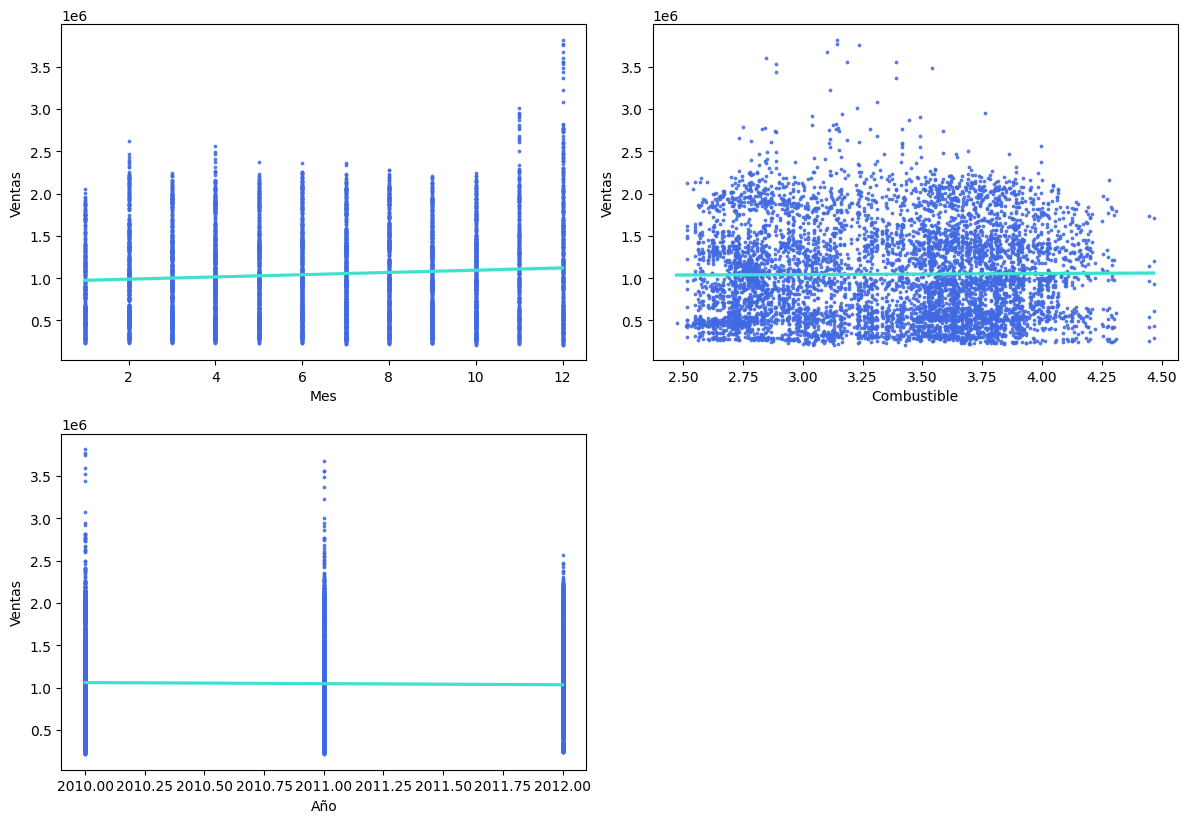

In [ ]:
# Número de las variables
n = 10
fig = plt.figure(figsize=(12,12))
# Correlaciones en pares
corr = numerical_df.corr()
#
cols = corr.nlargest(10, "Ventas")["Ventas"].index
# Calculate correlation
for i in np.arange(1,4):
    regline = df[cols[i]]
    ax = fig.add_subplot(3,2,i)
    sns.regplot(x=regline, y=df['Ventas'], scatter_kws={"color": "royalblue", "s": 3},
                line_kws={"color": "turquoise"})
plt.tight_layout()
plt.show()

PRUEBA DE REGRESION LINEAL


**7. Definición de variables**

Recodificacion de variables categóricas

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
var_cuantitativas = df_cleaned.select_dtypes('number').columns
var_cualitativas  =df_cleaned.select_dtypes('object').columns

In [ ]:
df[var_cualitativas]=df[var_cualitativas].apply(LabelEncoder().fit_transform)
df

,Tienda,Fecha,Ventas,Festivo,Temperatura,Combustible,CPI,Desempleo,Dia,Mes,Año
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,5,2,2010
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,12,2,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,5,3,2010
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,28,9,2012
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,5,10,2012
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,12,10,2012
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,19,10,2012


In [ ]:
# Excluyendo variables correlacionadas
X = df[['Tienda', 'Ventas', 'Temperatura', 'Combustible', 'CPI',
        'Desempleo', 'Festivo', 'Dia', 'Mes', 'Año']]

# Normalizing 'Ventas' to be within the range [0,1]
y = df['Ventas'] / df['Ventas'].max()  # Assuming 'Ventas' are non-negative

logit_model = sm.Logit(y, X)
result = logit_model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.434982
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 Ventas   No. Observations:                 6435
Model:                          Logit   Df Residuals:                     6425
Method:                           MLE   Df Model:                            9
Date:                Tue, 06 Aug 2024   Pseudo R-squ.:                  -1.213
Time:                        00:32:24   Log-Likelihood:                -2799.1
converged:                       True   LL-Null:                       -1264.9
Covariance Type:            nonrobust   LLR p-value:                     1.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Tienda          0.0012      0.003      0.452      0.651      -0.004       0.006
Ventas       1.358e-06   5

In [ ]:
# Excluyendo variables correlacionadas
X = df[['Ventas','Año']]
y = df['Ventas'] / df['Ventas'].max()  # Normalize 'Ventas' to [0, 1]

logit_model = sm.Logit(y, X)
result = logit_model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.434919
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 Ventas   No. Observations:                 6435
Model:                          Logit   Df Residuals:                     6433
Method:                           MLE   Df Model:                            1
Date:                Tue, 06 Aug 2024   Pseudo R-squ.:                  -1.213
Time:                        00:36:29   Log-Likelihood:                -2798.7
converged:                       True   LL-Null:                       -1264.9
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Ventas      1.345e-06   5.39e-08     24.962      0.000    1.24e-06    1.45e-06
Año           -0.0012   3.53e

In [ ]:
# Calcular los ratios de odds
odds_ratios = pd.DataFrame({
    'Coeficientes': result.params,
    'Ratios de Odds': np.exp(result.params)
})

# Mostrar los ratios de odds
print(odds_ratios)

        Coeficientes  Ratios de Odds
Ventas      0.000001        1.000001
Año        -0.001240        0.998761


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Tienda       6435 non-null   int64         
 1   Fecha        6435 non-null   datetime64[ns]
 2   Ventas       6435 non-null   float64       
 3   Festivo      6435 non-null   int64         
 4   Temperatura  6435 non-null   float64       
 5   Combustible  6435 non-null   float64       
 6   CPI          6435 non-null   float64       
 7   Desempleo    6435 non-null   float64       
 8   Dia          6435 non-null   int32         
 9   Mes          6435 non-null   int32         
 10  Año          6435 non-null   int32         
dtypes: datetime64[ns](1), float64(5), int32(3), int64(2)
memory usage: 477.7 KB


In [ ]:
var_cualitativas

Index([], dtype='object')

In [ ]:
import statsmodels.api as sm

# Assuming 'Festivo' is a column in your DataFrame 'df'
# Use the normalized 'Ventas' (y from previous code block)
y = df['Ventas'] / df['Ventas'].max()

X = sm.add_constant(X)

logit_model = sm.Logit(y, X)  # Use normalized 'Ventas' here
result = logit_model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.507128
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 Ventas   No. Observations:                 6435
Model:                          Logit   Df Residuals:                     6433
Method:                           MLE   Df Model:                            1
Date:                Tue, 06 Aug 2024   Pseudo R-squ.:                  -1.580
Time:                        00:50:03   Log-Likelihood:                -3263.4
converged:                       True   LL-Null:                       -1264.9
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.4703     70.529      0.475      0.635    -104.765     171.705
Año           -0.0171      0.

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# 1. Check for high correlation:
correlation_matrix = X.corr()
print(correlation_matrix)

# 2. Check for separation:
print(df.groupby('HighSales')['Ventas'].describe())

# 3. If high correlation or separation exists, consider:
#    - Removing highly correlated variables
#    - Using regularization techniques (e.g., add a penalty term to the model)
#    - Collecting more data to reduce separation

# Example of removing 'Ventas' if it's highly correlated:
X = X.drop('Ventas', axis=1)  # Assuming 'Ventas' is a column in X

# Example of adding a L2 regularization (penalty) term:
logit_model = sm.Logit(df['HighSales'], X)
result = logit_model.fit_regularized(alpha=0.1, L1_wt=0)  # Adjust alpha as needed

print(result.summary())

       const  Año
const    NaN  NaN
Año      NaN  1.0
            count          mean            std        min           25%  \
HighSales                                                                 
0          3218.0  5.832889e+05  205702.817730  209986.25  4.236923e+05   
1          3217.0  1.510785e+06  405666.767455  960945.43  1.192214e+06   

                   50%           75%         max  
HighSales                                         
0           553350.105  7.536099e+05   960746.04  
1          1420405.410  1.817887e+06  3818686.45  


KeyError: "['Ventas'] not found in axis"

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# Creamos la instancia del objeto OneHotEncoder
onehotencoder = OneHotEncoder()

# Assuming 'y' is a column in your DataFrame and you want to exclude it from one-hot encoding
# Select categorical columns except 'y'
categorical_columns = [col for col in var_cualitativas if col != 'y']
df_categorical = df[categorical_columns].reset_index(drop=True)

# Aplicar OneHotEncoder a las variables categóricas
encoded_data = onehotencoder.fit_transform(df_categorical)



In [ ]:
# Obtener los nombres de las categorías después de la codificación
categories = onehotencoder.categories_

# Generar los nombres de las columnas
column_names = []
for i, (col, categories_array) in enumerate(zip(df_categorical.columns, categories)):
    column_names.extend([f"{col}_{category}" for category in categories_array])

# Convertir el resultado de la codificación en un DataFrame de pandas
df_encoded = pd.DataFrame(encoded_data.toarray(), columns=column_names, index=df.index)

# Agregar los nombres de las columnas
df_encoded.columns = column_names

# Concatenate the encoded data with the original DataFrame, excluding original categorical columns
df_ = pd.concat([df.drop(var_cualitativas.drop("y", errors='ignore').tolist(), axis=1), df_encoded], axis=1)

In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Empty DataFrame


In [ ]:
df_encoded

""
0
1
2
3
4
...
6430
6431
6432
6433


In [ ]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Tienda       6435 non-null   int64         
 1   Fecha        6435 non-null   datetime64[ns]
 2   Ventas       6435 non-null   float64       
 3   Festivo      6435 non-null   int64         
 4   Temperatura  6435 non-null   float64       
 5   Combustible  6435 non-null   float64       
 6   CPI          6435 non-null   float64       
 7   Desempleo    6435 non-null   float64       
 8   Dia          6435 non-null   int32         
 9   Mes          6435 non-null   int32         
 10  Año          6435 non-null   int32         
 11  HighSales    6435 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int32(3), int64(3)
memory usage: 528.0 KB


In [ ]:
df_.columns

Index(['Tienda', 'Fecha', 'Ventas', 'Festivo', 'Temperatura', 'Combustible',
       'CPI', 'Desempleo', 'Dia', 'Mes', 'Año', 'HighSales'],
      dtype='object')

En el preprocesamiento de datos, se ha optado por utilizar **LabelEncoder** en lugar de **OneHotEncoder** para codificar las variables categóricas. Esta elección se basa en el hecho de que **LabelEncoder** asigna valores numéricos a las categorías, esto debido a utilidad del ejercicio ya que **OneHotEncoder** genera clasificaciones individuales, generando en fecha al menos 135 clasificaciones, por esta razón se escogió este método. Adicionalmente, se espera generar la data correcta con la mejor precisión e interpretación del modelo.

**8. Modelado**

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf # Import formula API for easier model specification

# Rename the 'logit' variable to avoid conflicts
my_logit_array = logit

# Use the formula API to fit the logit model
regresion = smf.logit("Ventas ~ Tienda+Festivo+Temperatura+Combustible+CPI+Desempleo+Dia+Mes+Año", data=df_)
results = regresion.fit()

Optimization terminated successfully.
         Current function value: 0.426398
         Iterations 8


In [ ]:
print(results.summary())

                           Logit Regression Results                           
Dep. Variable:                 Ventas   No. Observations:                 6435
Model:                          Logit   Df Residuals:                     6425
Method:                           MLE   Df Model:                            9
Date:                Tue, 06 Aug 2024   Pseudo R-squ.:                  -1.912
Time:                        01:00:45   Log-Likelihood:                -2743.9
converged:                       True   LL-Null:                       -942.25
Covariance Type:            nonrobust   LLR p-value:                     1.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     117.9997    139.252      0.847      0.397    -154.929     390.929
Tienda         -0.0251      0.002    -10.123      0.000      -0.030      -0.020
Festivo         0.0696      0.118      0.592    

De los resultados, se debe eliminar las variables que no son significativas, se elimina entonces

In [ ]:
# Your logistic regression code
regresion_2 = smf.logit("Ventas ~ Tienda+CPI+Desempleo+\
 Mes", data=df_) # Use smf instead of sms
results_2 = regresion_2.fit()

Optimization terminated successfully.
         Current function value: 0.426640
         Iterations 6


In [ ]:
coeficientes = results_2.params
odds_ratios = np.exp(coeficientes)
resultados_df = pd.DataFrame({'Coeficiente': coeficientes, 'Odds Ratio': odds_ratios})
print(resultados_df)

           Coeficiente  Odds Ratio
Intercept     0.197451    1.218293
Tienda       -0.024948    0.975360
CPI          -0.004048    0.995960
Desempleo    -0.036791    0.963878
Mes           0.021021    1.021244


**9. Supuestos**

Variable dependiente categórica binaria

In [ ]:
df_.Festivo

0       0
1       1
2       0
3       0
4       0
       ..
6430    0
6431    0
6432    0
6433    0
6434    0
Name: Festivo, Length: 6435, dtype: int64

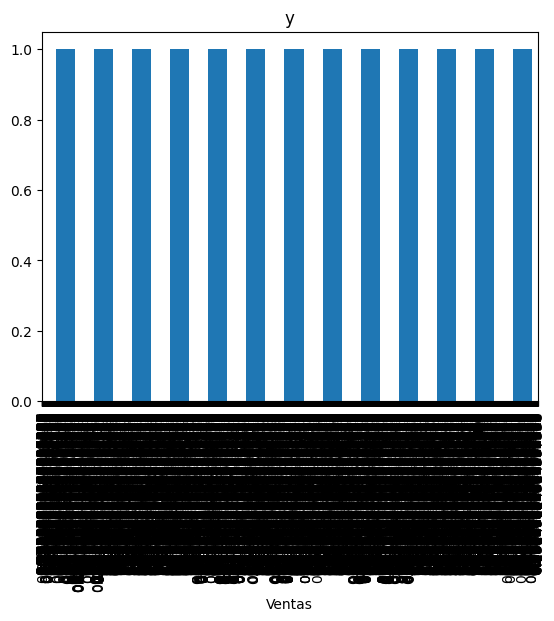

In [ ]:
df_.Ventas.value_counts().plot(kind='bar', title="y")
plt.show()

Este supuesto no se cumple ya que existen mas de dos categorias

Relación lineal entre odds y variable continua

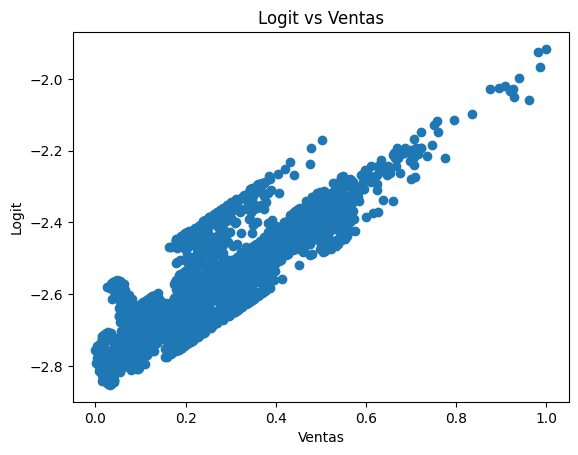

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression # Example model

# Assuming 'df_' contains the features you want to use for prediction
# Replace 'feature1', 'feature2', and 'target_variable' with the correct column names from df_
X = df_[['Ventas', 'Desempleo']]  # Example feature columns, adjust as needed
y = df_['Festivo']  # Example target variable column, adjust as needed
model = LogisticRegression()
model.fit(X, y)

# Now you can use the trained model
y_pred = model.predict_proba(X)[:, 1]  # Probabilidades predichas for the positive class
logit = np.log(y_pred / (1 - y_pred))  # Logit

plt.scatter(df_['Ventas'], logit)
plt.xlabel('Ventas')
plt.ylabel('Logit')
plt.title('Logit vs Ventas') # Changed title to reflect the x-axis variable
plt.show()

No colinealidad perfecta entre las covariables

In [ ]:
df_.dtypes

Tienda                  int64
Fecha          datetime64[ns]
Ventas                float64
Festivo                 int64
Temperatura           float64
Combustible           float64
CPI                   float64
Desempleo             float64
Dia                     int32
Mes                     int32
Año                     int32
HighSales               int64
dtype: object

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
var_predictoras=["Ventas"]

In [ ]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Verifica si el DataFrame está vacío
if df_.empty:
    print("Error: El DataFrame está vacío.")
else:
    # Selecciona todas las columnas numéricas como variables predictoras (excepto 'Ventas' si es la variable objetivo)
    var_predictoras = df_.select_dtypes(include=['number']).columns.tolist()
    if 'Ventas' in var_predictoras:
        var_predictoras.remove('Ventas')

    if len(var_predictoras) < 2:
        print("Error: Se necesitan al menos dos variables predictoras para calcular el VIF.")
    else:
        # Calcula el VIF para cada variable predictora
        vif = pd.DataFrame()
        vif["Variable"] = var_predictoras
        vif["VIF"] = [variance_inflation_factor(df_[var_predictoras].values, i) for i in range(df_[var_predictoras].shape[1])]

        # Muestra los resultados
        print(vif)

      Variable         VIF
0       Tienda    4.760990
1      Festivo    1.141299
2  Temperatura   14.533803
3  Combustible   60.133870
4          CPI   25.589341
5    Desempleo   22.889805
6          Dia    4.225965
7          Mes    5.490918
8          Año  147.357231
9    HighSales    2.172661
